Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not


In [57]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score,classification_report,confusion_matrix

In [15]:
fraud = pd.read_csv('Fraud_check.csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [16]:
fraud.loc[fraud['Taxable.Income']<=30000,'Taxable_Income'] = 0
fraud.loc[fraud['Taxable.Income']>30000,'Taxable_Income'] = 1

In [21]:
data=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)

In [24]:
data.head()

,Taxable.Income,City.Population,Work.Experience,Taxable_Income,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,1.0,0,0,1,1
1,33700,134075,18,1.0,1,0,0,1
2,36925,160205,30,1.0,0,1,0,1
3,50190,193264,15,1.0,1,0,1,1
4,81002,27533,28,1.0,0,1,0,0


In [23]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [27]:
norm_fraud = norm_func(data.iloc[:,1:])

In [30]:
norm_fraud.head()

,City.Population,Work.Experience,Taxable_Income,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.139472,0.333333,1.0,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,1.0,0.0,0.0,1.0
2,0.772568,1.000000,1.0,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,1.0,0.0,1.0,1.0
4,0.010081,0.933333,1.0,0.0,1.0,0.0,0.0


In [33]:
X = norm_fraud[['City.Population','Work.Experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']]
Y = data.Taxable_Income

In [34]:
X.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0


In [59]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20)


In [60]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((480, 6), (120, 6), (480,), (120,))

In [61]:
model = DecisionTreeClassifier( criterion='entropy',max_depth =3)
model.fit(x_train,y_train)
pred_y = model.predict(x_test)
print(pred_y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]


[Text(310.0, 792.75, 'Undergrad <= 0.018\nentropy = 0.714\nsamples = 480\nvalue = [94, 386]\nclass = 1(Good)'),
 Text(155.0, 566.25, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13]\nclass = 1(Good)'),
 Text(465.0, 566.25, 'Undergrad <= 0.021\nentropy = 0.724\nsamples = 467\nvalue = [94, 373]\nclass = 1(Good)'),
 Text(310.0, 339.75, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0(Risky)'),
 Text(620.0, 339.75, 'Undergrad <= 0.037\nentropy = 0.721\nsamples = 466\nvalue = [93, 373]\nclass = 1(Good)'),
 Text(465.0, 113.25, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = 1(Good)'),
 Text(775.0, 113.25, 'entropy = 0.729\nsamples = 457\nvalue = [93, 364]\nclass = 1(Good)')]

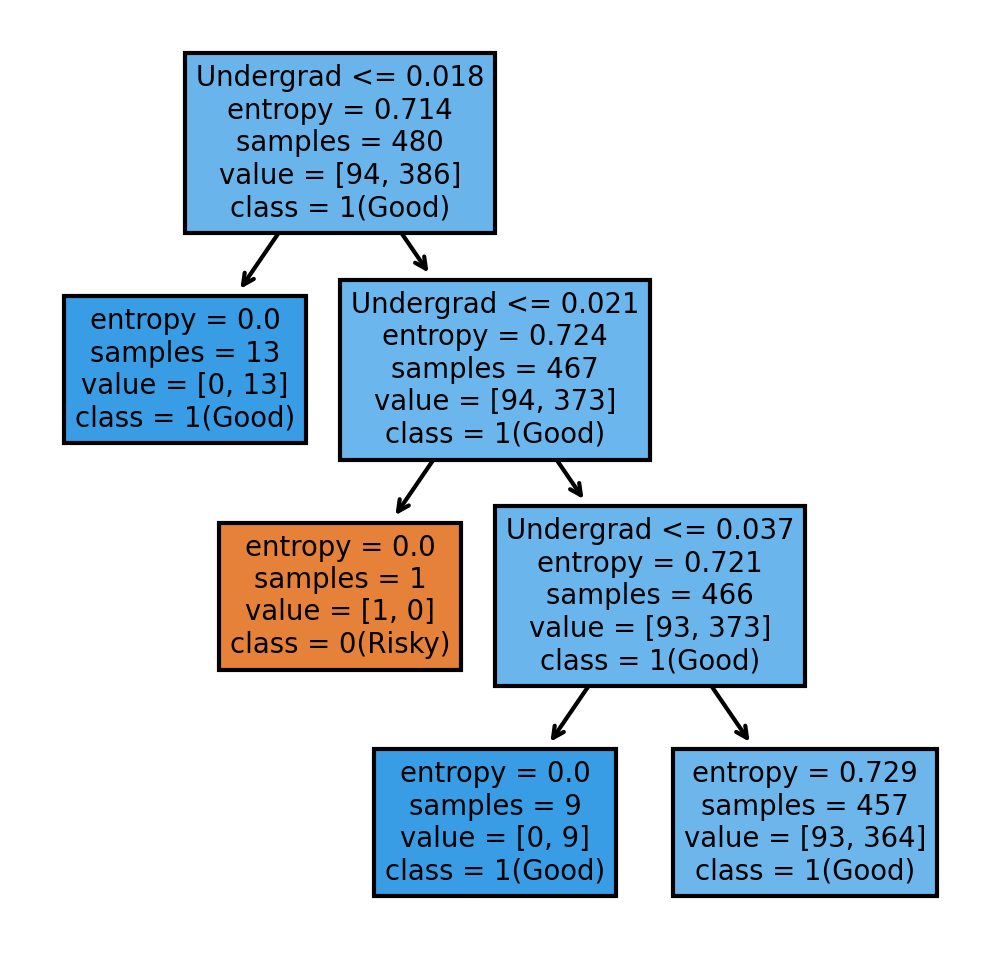

In [46]:
fn =['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=["0(Risky)", "1(Good)"]
fig,axes =plt.subplots(nrows=1,ncols=1,figsize =(4,4),dpi =300)
tree.plot_tree(model,feature_names=fn,
               class_names=cn,
               filled= True)

In [62]:
print(confusion_matrix(y_test,pred_y))

[[ 0 22]
 [ 2 96]]


In [63]:
accuracy =accuracy_score(y_test,pred_y)
print(accuracy)

0.8


In [64]:
pd.crosstab(pred_y,y_test)

Taxable_Income,0.0,1.0
row_0,,
0.0,0,2
1.0,22,96


In [65]:
count_misclassified =(y_test != pred_y).sum()
count_misclassified

24

In [66]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.81      0.98      0.89        98

    accuracy                           0.80       120
   macro avg       0.41      0.49      0.44       120
weighted avg       0.66      0.80      0.73       120



In [67]:
print(np.mean(pred_y==y_test))

0.8
